<h1 style="text-align:center;">Analysis of Different Denoising Algorithms</h1>

Done by:
```
Adarsh Gupta
220101003
CSE
```

All implementations done using OpenCV & Scikit-Image

<hr>
<h2 style="text-align:center;">Making Necessary Imports</h3>

In [28]:
#Importing Required Libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,5]
from skimage import io
import cv2
from skimage.util import random_noise 

In [2]:
#Importing Required Images

img_noisy = cv2.imread('images/monalisa_noisy.jpg')
img_clear = cv2.imread('images/monalisa.jpg')

Text(0.5, 0, 'GOAL')

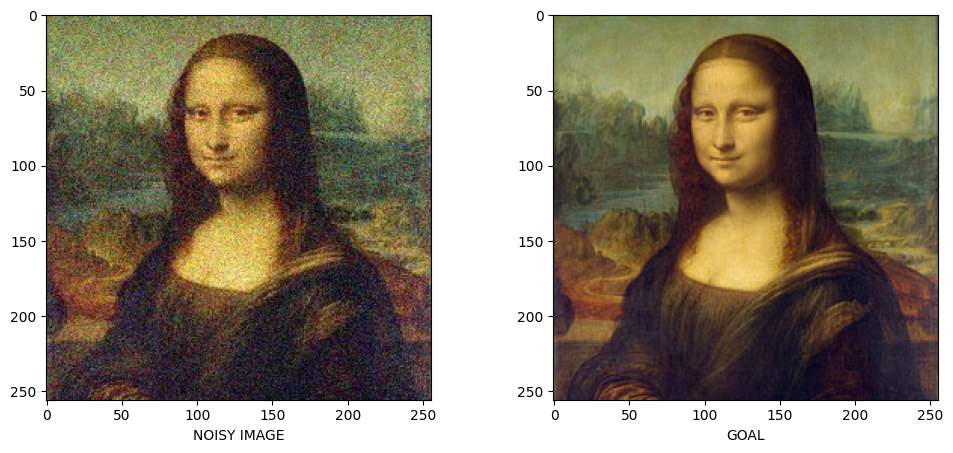

In [3]:
#Converting to RGB to Plot

img_noisyRGB = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2RGB)
img_clearRGB = cv2.cvtColor(img_clear, cv2.COLOR_BGR2RGB)

#Plotting via subplots
plt.subplot(1,2,1)
plt.imshow(img_noisyRGB)
plt.xlabel('NOISY IMAGE')
plt.subplot(1,2,2)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')

<hr>
<h2 style="text-align:center;">Using Normalised Filter</h3></br>

#### Pros and Cons of Using a Normalized np.ones Kernel

**Pros:**

1. **Uniform and Equal Weighting:** Useful when a simple, uniform average of pixel values is desired without any specific weighting or emphasis on particular pixels.

2. **Ease of Use and Implementation** 

3. **Constant Energy Preservation:** Helps in preserving the overall energy of the signal during convolution or filtering operations.

**Cons:**

1. **Lack of Adaptive Filtering:** This can limit its effectiveness in scenarios where adaptive filtering based on local image features is required for optimal denoising or enhancement.

2. **Limited Noise Reduction Capability** 

3. **Limited Feature Extraction:** This limits its capability in extracting meaningful features or enhancing specific image characteristics beyond simple averaging.


Text(0.5, 0, 'GOAL')

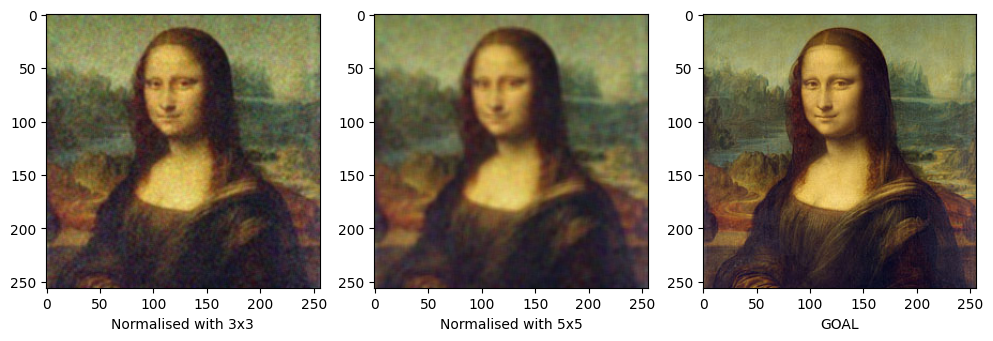

In [4]:
#Defining Normalised Kernel for convolution
kernel3 = np.ones((3,3),np.float32)/9

#Applying convolution using kernel
norm3 = cv2.filter2D(img_noisy,-1,kernel3)

#Same as above but with larger kernel
kernel5 = np.ones((5,5),np.float32)/25
norm5 = cv2.filter2D(img_noisy,-1,kernel5)

#Converting to RGB to Plot
norm5RGB = cv2.cvtColor(norm5, cv2.COLOR_BGR2RGB)
norm3RGB = cv2.cvtColor(norm3, cv2.COLOR_BGR2RGB)

#Plotting via subplots
plt.subplot(1,3,1)
plt.imshow(norm3RGB)
plt.xlabel('Normalised with 3x3')
plt.subplot(1,3,2)
plt.imshow(norm5RGB)
plt.xlabel('Normalised with 5x5')
plt.subplot(1,3,3)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')

<hr>
<h2 style="text-align:center;">Gaussian Blur</h2></br>
In this methods, we perform convolution using a gaussian kernel. It is an example of linear denoising, it does not preserve edges :(


#### Pros and Cons of Gaussian Blurring

**Pros:**

1. **Simplicity and Efficiency:** The computations involved in calculating the weighted average are straightforward and efficient. It is commonly used due to its simplicity and computational efficiency.

2. **Control over Blur Amount:** The amount of blurring can be controlled by adjusting the standard deviation of the Gaussian distribution. 

3. **Noise Reduction:** It smooths out pixel values by applying a weighted average based on a Gaussian distribution, resulting in noise reduction.


**Cons:**

1. **Loss of Fine Details:** Gaussian blurring does not preserves edges, so the finer details may be lost.

2. **Trade-off between Noise Reduction and Detail Preservation:** Adjusting the standard deviation allows control over the amount of blurring but involves a trade-off between noise reduction and preservation of image details. 

3. **Smearing Effect:** The blurring effect of Gaussian filtering can introduce a slight smearing or halo effect around edges in the image. This occurs because neighboring pixels contribute to the weighted average, causing some blurring around sharp transitions.

Text(0.5, 0, 'GOAL')

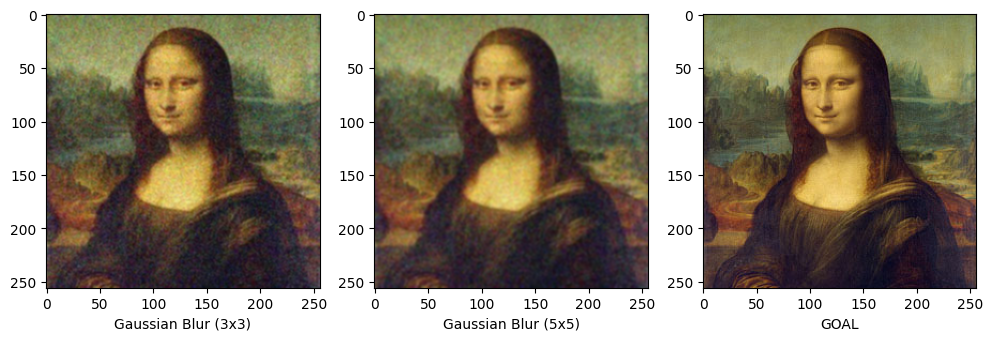

In [5]:
#Applying Gaussian Denoising using Inbuilt Gaussian Blur function with different kernel sizes
gaussian3 = cv2.GaussianBlur(img_noisy , (3,3) , 0)

gaussian5 = cv2.GaussianBlur(img_noisy , (5,5) , 0)


#Converting to RGB to Plot
gaussian5RGB = cv2.cvtColor(gaussian5, cv2.COLOR_BGR2RGB)
gaussian3RGB = cv2.cvtColor(gaussian3, cv2.COLOR_BGR2RGB)

#Plotting via subplots
plt.subplot(1,3,1)
plt.imshow(gaussian3RGB)
plt.xlabel('Gaussian Blur (3x3)')
plt.subplot(1,3,2)
plt.imshow(gaussian5RGB)
plt.xlabel('Gaussian Blur (5x5)')
plt.subplot(1,3,3)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')

<hr>
<h2 style="text-align:center;">Median Blur</h2></br>
This is an example of a non-linear method. It preserves the edges.


#### Pros and Cons of Median Filtering

**Pros:**

1. **Preserves Edges:** Median filtering preserves edges in the image. Unlike linear filters, it does not blur sharp transitions between pixels, ensuring that edges remain intact.

2. **Simple and Fast:** Median filtering is a simple and computationally efficient algorithm. 

**Cons:**

1. **Loss of Fine Details:** Median filtering can result in a loss of fine details in the image. While it preserves edges, it may blur small-scale textures and details due to its non-linear nature.

2. **Limited Noise Reduction:** Median filtering is not as effective in reducing noise that is spread over a wider area or noise with a non-impulse nature. 

Text(0.5, 0, 'GOAL')

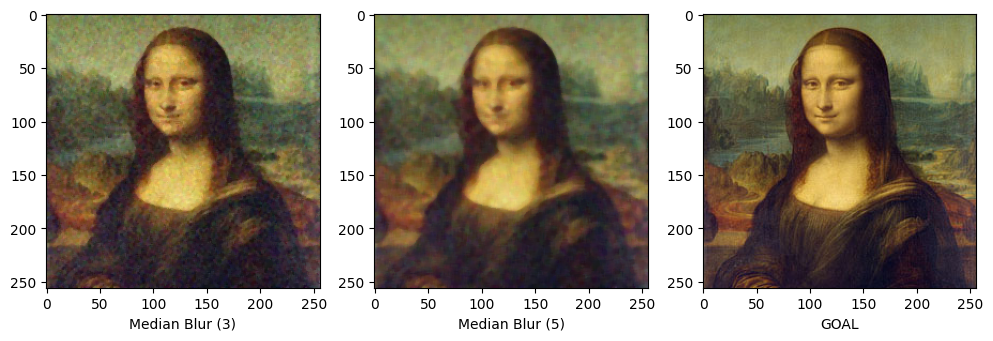

In [6]:
#Applying Median Denoising using Inbuilt Media Blur function with different parameters
median3 = cv2.medianBlur(img_noisy,3)

median5 = cv2.medianBlur(img_noisy,5)

#Converting to RGB to Plot
median3RGB = cv2.cvtColor(median3, cv2.COLOR_BGR2RGB)
median5RGB = cv2.cvtColor(median5, cv2.COLOR_BGR2RGB)

#Plotting via subplots
plt.subplot(1,3,1)
plt.imshow(median3RGB)
plt.xlabel('Median Blur (3)')
plt.subplot(1,3,2)
plt.imshow(median5RGB)
plt.xlabel('Median Blur (5)')
plt.subplot(1,3,3)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')

<hr>
<h2 style="text-align:center;">Bilateral Blur</h2></br>
Both has noise removal as well as edge preservation

#### Pros and Cons of Bilateral Filtering

**Pros:**

1. **Noise Reduction with Edge Preservation:** Bilateral filtering effectively reduces noise while preserving edges in the image. 

2. **Control over Filtering Strength**

**Cons:**

1. **Computationally Intensive:** Bilateral filtering involves calculations for each pixel based on its neighboring pixels, which can be computationally expensive, especially for large images. 

2. **Limited in Handling Texture Noise** 

3. **Halo Effect:** Bilateral filtering can introduce a halo effect around sharp edges in the image.

Text(0.5, 0, 'GOAL')

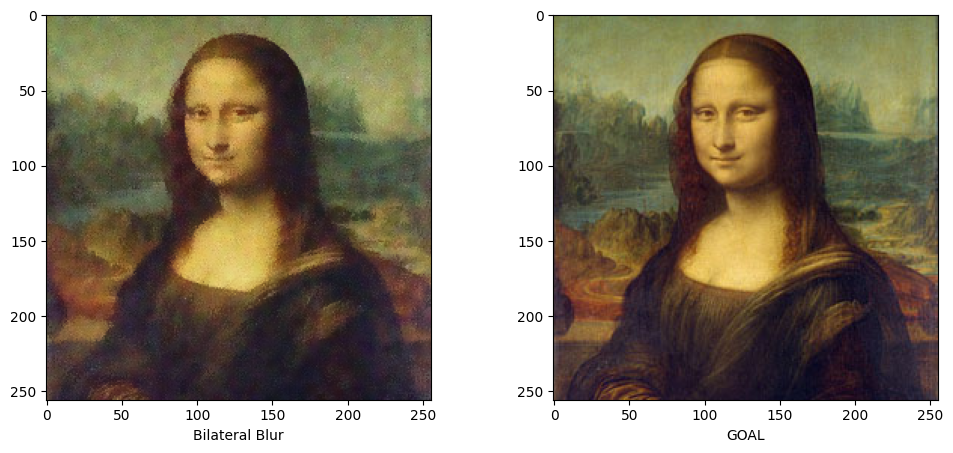

In [7]:
#Applying Bilateral Denoising using Inbuilt Bilateral Blur function
bilateral = cv2.bilateralFilter(img_noisy,9,75,75)

#Converting to RGB to Plot
bilateralRGB = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

#Plotting via subplots
plt.subplot(1,2,1)
plt.imshow(bilateralRGB)
plt.xlabel('Bilateral Blur')
plt.subplot(1,2,2)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')

<hr>
<h2 style="text-align:center;">Non-Local Means Denoising</h2></br>
Apparently it's the best :)

## Pros and Cons of Non-local Means Denoising

**Pros:**

1. **Effective for Various Noise Types** 

2. **Preserves Fine Details:** It compares patches of similar structure throughout the image to estimate the denoised pixel value, resulting in excellent detail preservation.

3. **Adaptive Denoising:** The algorithm adapts to the local image characteristics and noise level, making it suitable for denoising images with varying noise profiles. 

**Cons:**

1. **Computational Complexity:** Non-local Means Denoising is computationally intensive, especially for large images. 

2. **Parameter Tuning:** Non-local Means Denoising involves several parameters that need to be carefully tuned for optimal results. 

3. **Processing Time:** Due to the algorithm's complexity, Non-local Means Denoising can have longer processing times compared to simpler denoising methods.

Text(0.5, 0, 'GOAL')

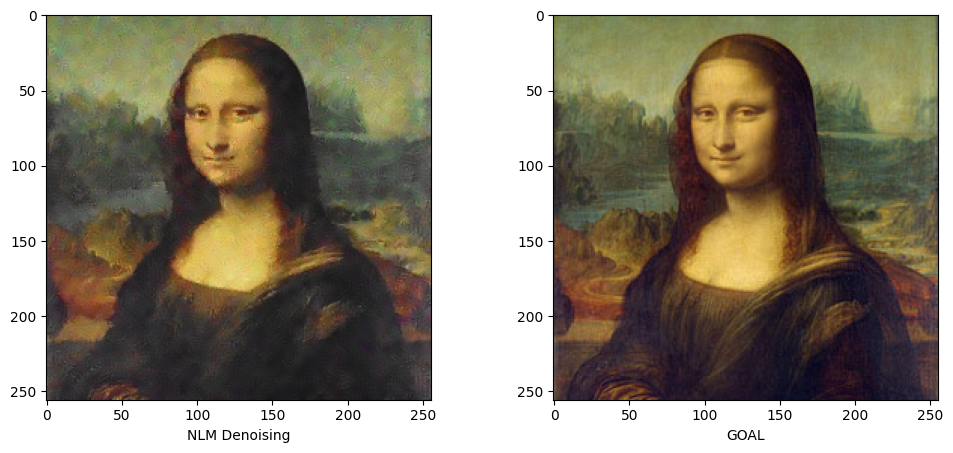

In [8]:
#This filter has been applied using the Scikit-Image library, since using OpenCV's fastNlMeansDenoisingColored function, would
#invovle tuning of many parameters

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float, io

img_noisy = io.imread('images/monalisa_noisy.jpg')

imgf = img_as_float(img_noisy)

sigma_est = np.mean(estimate_sigma(imgf, channel_axis=-1))

nlm = denoise_nl_means(imgf, h=1.15 * sigma_est, fast_mode=False, patch_size=5, patch_distance=3)

#Plotting via subplots
plt.subplot(1,2,1)
plt.imshow(nlm)
plt.xlabel('NLM Denoising')
plt.subplot(1,2,2)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')

<hr>
<hr>

## Showing All Results

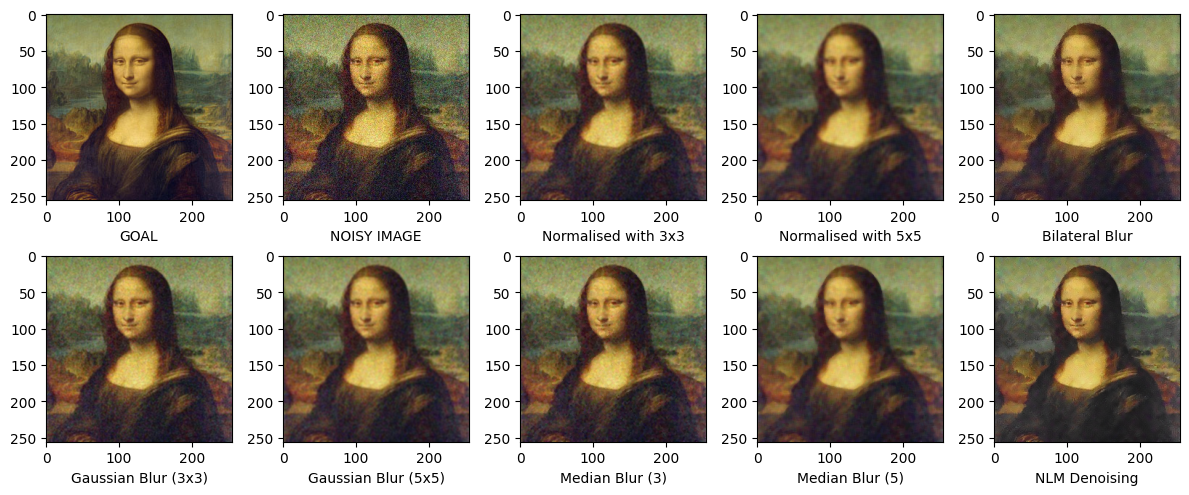

In [9]:
plt.subplot(2,5,1)
plt.imshow(img_clearRGB)
plt.xlabel('GOAL')
plt.subplot(2,5,2)
plt.imshow(img_noisyRGB)
plt.xlabel('NOISY IMAGE')
plt.subplot(2,5,3)
plt.imshow(norm3RGB)
plt.xlabel('Normalised with 3x3')
plt.subplot(2,5,4)
plt.imshow(norm5RGB)
plt.xlabel('Normalised with 5x5')
plt.subplot(2,5,5)
plt.imshow(bilateralRGB)
plt.xlabel('Bilateral Blur')
plt.subplot(2,5,6)
plt.imshow(gaussian3RGB)
plt.xlabel('Gaussian Blur (3x3)')
plt.subplot(2,5,7)
plt.imshow(gaussian5RGB)
plt.xlabel('Gaussian Blur (5x5)')
plt.subplot(2,5,8)
plt.imshow(median3RGB)
plt.xlabel('Median Blur (3)')
plt.subplot(2,5,9)
plt.imshow(median5RGB)
plt.xlabel('Median Blur (5)')
plt.subplot(2,5,10)
plt.imshow(nlm)
plt.xlabel('NLM Denoising')
plt.tight_layout()

<hr>
<hr>

## So, which is the best algo for this image?

One thing we can do is find the distance vector between all images and the original image, to find the image with the most similarity to the given image

In [10]:
methods = [img_noisyRGB, norm3RGB, norm5RGB, bilateralRGB, gaussian3RGB, gaussian5RGB, median3RGB, median5RGB, nlm]

In [11]:
scores=[]
for i, method in enumerate(methods):
    score = np.linalg.norm(method-img_clearRGB)
    scores.append([score,i])
scores.sort()

In [12]:
scores

[[41322.80668497062, 8],
 [69534.19547963433, 2],
 [69806.58599301358, 5],
 [70297.97479301946, 3],
 [70352.61400971537, 4],
 [70360.52206315698, 1],
 [70929.0384116407, 7],
 [71691.93569712008, 6],
 [72743.90302973852, 0]]

Hence The Best Algorithm for Denoising The Mona Lisa Award Goes to ......

NLM!!! (haha, no suprises there)
(sorry it's like 5:30 in the morning rn, I have been doing this for the last 3:30 hours, I need some sort of stimulation to keep my eyes open)

I guess that's it! Thank you for your time to read through this!

ADARSH GUPTA </br>
220101003 </br>
CSE